<a href="https://colab.research.google.com/github/nhjung-phd/TimeSeriesAnalysis/blob/main/notebooks/02_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 단순 선형 회귀(Linear Regression) 시계열 예측

yfinance 설치 (Colab에서 실행 시 필요)

In [1]:
!pip install yfinance --upgrade --no-cache-dir

모듈 import

In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

테슬라(TSLA) 주가 데이터 다운로드 (최근 2년치)

In [3]:
#df = yf.download("TSLA", start="2022-01-01", end="2024-01-01")
df = yf.download("TSLA", start="2010-01-01", end="2024-01-01")

[*********************100%***********************]  1 of 1 completed


데이터프레임 변환

In [4]:
df = df.reset_index()

독립 변수(Feature) 생성: 날짜를 숫자로 변환

In [5]:
df["Day"] = np.arange(len(df))

독립 변수(X)와 종속 변수(Y) 정의

In [6]:
X = df[["Day"]]  # 날짜를 독립 변수로 사용
y = df["Close"]  # 종속 변수: TSLA 종가

데이터 분할 (80% 학습, 20% 테스트)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

단순 선형 회귀 모델 학습

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

예측 수행

In [9]:
y_pred = model.predict(X_test)

결과 시각화

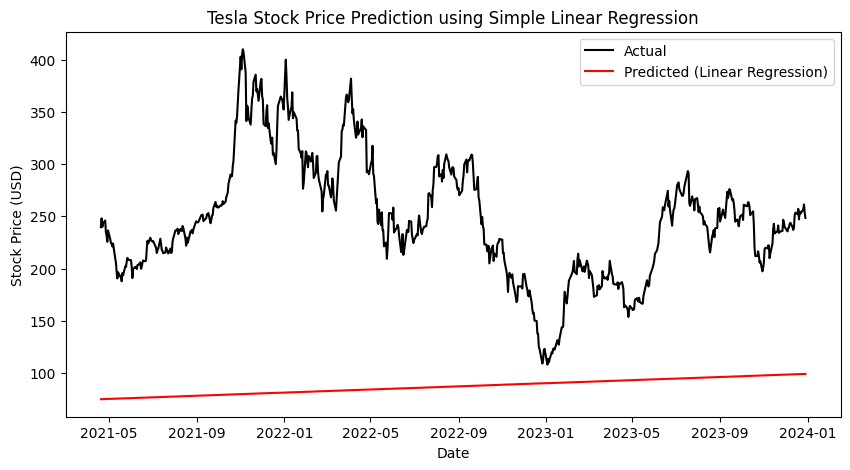

In [10]:
plt.figure(figsize=(10, 5))
plt.plot(df["Date"].iloc[len(X_train):], y_test, label="Actual", color="black")
plt.plot(df["Date"].iloc[len(X_train):], y_pred, label="Predicted (Linear Regression)", color="red")
plt.title("Tesla Stock Price Prediction using Simple Linear Regression")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.show()


# 슬라이딩 윈도우 적용 ( 단순 선형 회귀 모델)

모듈 import

In [11]:
# yfinance를 사용하여 테슬라(TSLA) 주가 데이터를 다운로드하고,
# 슬라이딩 윈도우 방식으로 80% 학습 / 20% 테스트 예측을 수행하는 코드

import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

테슬라(TSLA) 주가 데이터 다운로드 (최근 2년치)

In [12]:
# 📌 1️⃣ 테슬라(TSLA) 주가 데이터 다운로드 (최근 2년치)
df = yf.download("TSLA", start="2010-01-01", end="2024-01-01")

# 데이터프레임 변환
df = df.reset_index()

[*********************100%***********************]  1 of 1 completed


Feature 생성: 날짜를 숫자로 변환

In [13]:
# 📌 2️⃣ Feature 생성: 날짜를 숫자로 변환
df["Day"] = np.arange(len(df))

학습(train) / 테스트(test) 데이터 분할 (80:20)

In [14]:
# 📌 3️⃣ 학습(train) / 테스트(test) 데이터 분할 (80:20)
X = df[["Day"]]
y = df["Close"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

Feature 생성: 날짜를 숫자로 변환

In [15]:
# 📌 2️⃣ Feature 생성: 날짜를 숫자로 변환
df["Day"] = np.arange(len(df))

# 📌 3️⃣ 학습(train) / 테스트(test) 데이터 분할 (80:20)
X = df[["Day"]]
y = df["Close"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

80% 학습 구간: 슬라이딩 윈도우 방식으로 학습

In [16]:
# 📌 4️⃣ 80% 학습 구간: 슬라이딩 윈도우 방식으로 학습
window_size = 30  # 최소 학습 기간 (30일)
train_predictions = []

for i in range(window_size, len(X_train) - 1):
    # 매번 새로운 데이터를 포함하여 학습 (슬라이딩 윈도우 적용)
    X_train_sliding = X_train.iloc[: i]
    y_train_sliding = y_train.iloc[: i]

    # 테스트할 데이터 (하루 뒤 예측)
    X_train_next = X_train.iloc[i : i + 1]

    # 📌 단순 선형 회귀 모델 학습
    model = LinearRegression()
    model.fit(X_train_sliding, y_train_sliding)

    # 📌 예측 수행
    y_train_pred = model.predict(X_train_next)

    # 📌 예측값 저장
    train_predictions.append(y_train_pred[0])

20% 테스트 구간: 슬라이딩 윈도우 방식으로 예측 수행

In [17]:
# 📌 5️⃣ 20% 테스트 구간: 슬라이딩 윈도우 방식으로 예측 수행
test_predictions = []
actuals = []

for i in range(window_size, len(X_test) - 1):
    # 매번 새로운 데이터를 포함하여 학습 (슬라이딩 윈도우 적용)
    X_train_sliding = pd.concat([X_train, X_test.iloc[: i]])  # 기존 학습 데이터 + 테스트 데이터 일부
    y_train_sliding = pd.concat([y_train, y_test.iloc[: i]])

    # 테스트할 데이터 (하루 뒤 예측)
    X_test_next = X_test.iloc[i : i + 1]

    # 📌 단순 선형 회귀 모델 학습
    model = LinearRegression()
    model.fit(X_train_sliding, y_train_sliding)

    # 📌 예측 수행
    y_test_pred = model.predict(X_test_next)

    # 📌 실제값과 예측값 저장
    test_predictions.append(y_test_pred[0])
    actuals.append(y_test.iloc[i + 1])

성능 평가 (테스트 데이터 기준)

In [18]:
# 📌 6️⃣ 성능 평가 (테스트 데이터 기준)
mse = mean_squared_error(actuals, test_predictions)
r2 = r2_score(actuals, test_predictions)

print(f"📌 Mean Squared Error (MSE): {mse:.4f}")
print(f"📌 R-squared (R²): {r2:.4f}")


📌 Mean Squared Error (MSE): 14516.2265
📌 R-squared (R²): -3.2413


결과 시각화 (훈련 데이터 예측 vs 실제값)

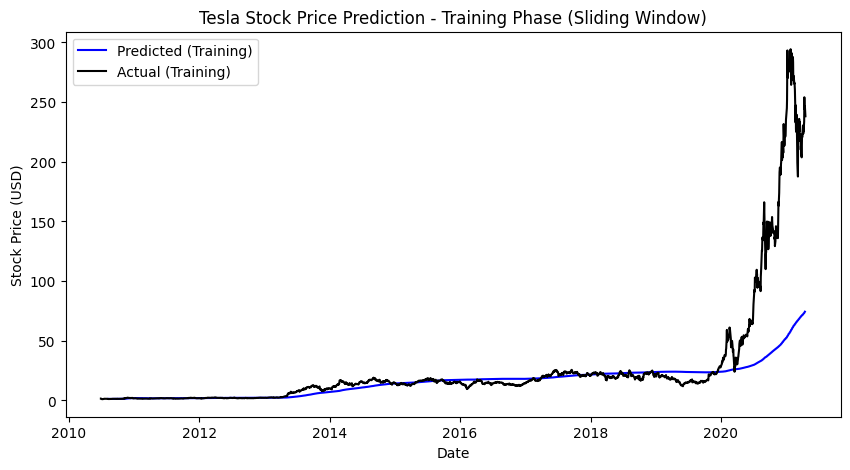

In [19]:
# 📌 7️⃣ 결과 시각화 (훈련 데이터 예측 vs 실제값)
plt.figure(figsize=(10, 5))
plt.plot(df["Date"].iloc[window_size: len(X_train) - 1], train_predictions, label="Predicted (Training)", color="blue")
plt.plot(df["Date"].iloc[: len(X_train)], y_train, label="Actual (Training)", color="black")
plt.title("Tesla Stock Price Prediction - Training Phase (Sliding Window)")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.show()


결과 시각화 (테스트 데이터 예측 vs 실제값)

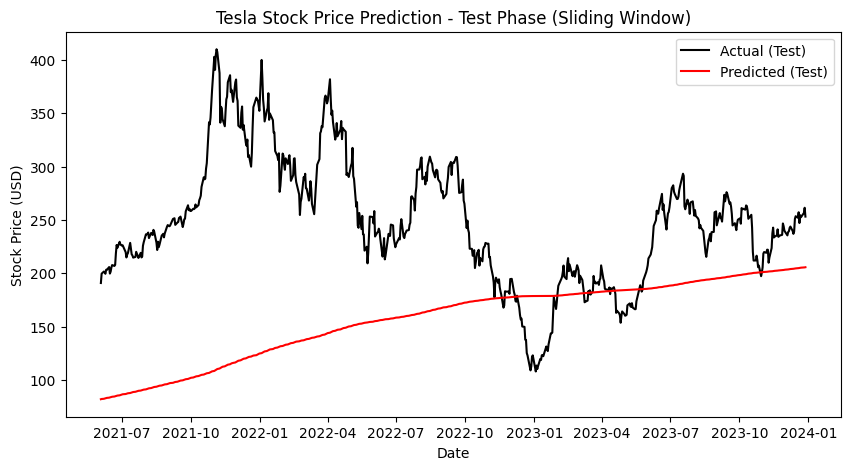

In [20]:
# 📌 8️⃣ 결과 시각화 (테스트 데이터 예측 vs 실제값)
plt.figure(figsize=(10, 5))

# Ensure both x and y data have the same length
x_data = df["Date"].iloc[len(X_train) + window_size + 1: len(X_train) + window_size + 1 + len(actuals) -1 ] #Adjusted to ensure same length
plt.plot(x_data, actuals[:-1], label="Actual (Test)", color="black") # Adjusted actuals to ensure same length

x_data = df["Date"].iloc[len(X_train) + window_size + 1: len(X_train) + window_size + 1 + len(test_predictions) -1 ] # Adjusted to ensure same length
plt.plot(x_data, test_predictions[:-1], label="Predicted (Test)", color="red") # Adjusted test_predictions to ensure same length

plt.title("Tesla Stock Price Prediction - Test Phase (Sliding Window)")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.show()
